# Un análisis a fondo de los factores que influyen en el salario

# **CAMBIAR**

**Motivación**: El absentismo y abandono laboral son costosos para la empresas, ya que estas emplean recursos para formar a trabajadores que pueden rendir por debajo de su potencial o incluso abandonar la empresa, llevándose consigo experiencia y formación valiosa. También existe un coste de oportunidad en la contractación asociado a que la compañía podría haber incorporado a otros empleados que sí aprovechasen los recursos invertdos. Por tanto, conocer los factores que influyen en el absentismo y abandono laboral es vital para que la empresa optimice sus costes laborales y decisiones de contratación.

**Objetivo**: El objetivo de este EDA es explorar los factores que influyen en el salario

Para explorar dichos factores, **asumiré una serie de relaciones** entre la variables objetivo (el salario mensual) y las variables explicativas

- **Hipótesis 1**: "El nivel de educación, los años de experiencia y el nivel de compromiso influyen positivamente en el salario mensual (existe una relación positiva)"
- **Hipótesis 2**: "El área de especialización tiene un impacto en el salario- El departamento en el que el empleado trabaja dentro de la empresa y su área de estudios influye en su salario mensual"
- **Hipótesis 3**:"La vida personal puede tener un impacto en el salario- El grado de satisfacción dentro de una relación sentimental, el estado matrimonial y la precepción del equilibrio entre la vida personal y laboral pueden tener influye en el salario mensual"
- **Hipótesis 4**: Relación entre variables explicativas

Al final del EDA comprobaré si dichas relaciones se cumplen.

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

#### 1. DATASET ABANDONO LABORAL

- 1470 filas y 35 columnas
- CAMBIAR: Tras eliminar las columas redundantes quedan 30 columnas
- No hay 'missing values'
- CAMBIAR: 22 variables son enteros y 8 son objetos.
- Las variables 'objetos' son variables categóricas nominales
- Dentro de las variables numericas hay variables categóricas ordinales que toman los siguientes valores:
    - Education: 1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor'
    - EnvironmentSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
    - JobInvolvement: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
    - JobSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
    - PerformanceRating: 1 'Low', 2 'Good', 3 'Excellent', 4 'Outstanding'
    - RelationshipSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
    - WorkLifeBalance: 1 'Bad', 2 'Good', 3 'Better', 4 'Best'

- Veré si conviene convertir las variables categóricas nominales en variables 'dummy' para realizar un mejor análisis

In [104]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\rafam\OneDrive\Documentos\GitHub\mi_copia_dsftmayo24semana1.1\semana 2 y 3\1_Data_Analysis\Entregas\EDA\WA_Fn-UseC_-HR-Employee-Attrition.tsv.txt', delimiter='\t')
df
df1 = pd.DataFrame(df)
fuente_1 = "https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset"

In [105]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [106]:
df1.corr(numeric_only=True)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


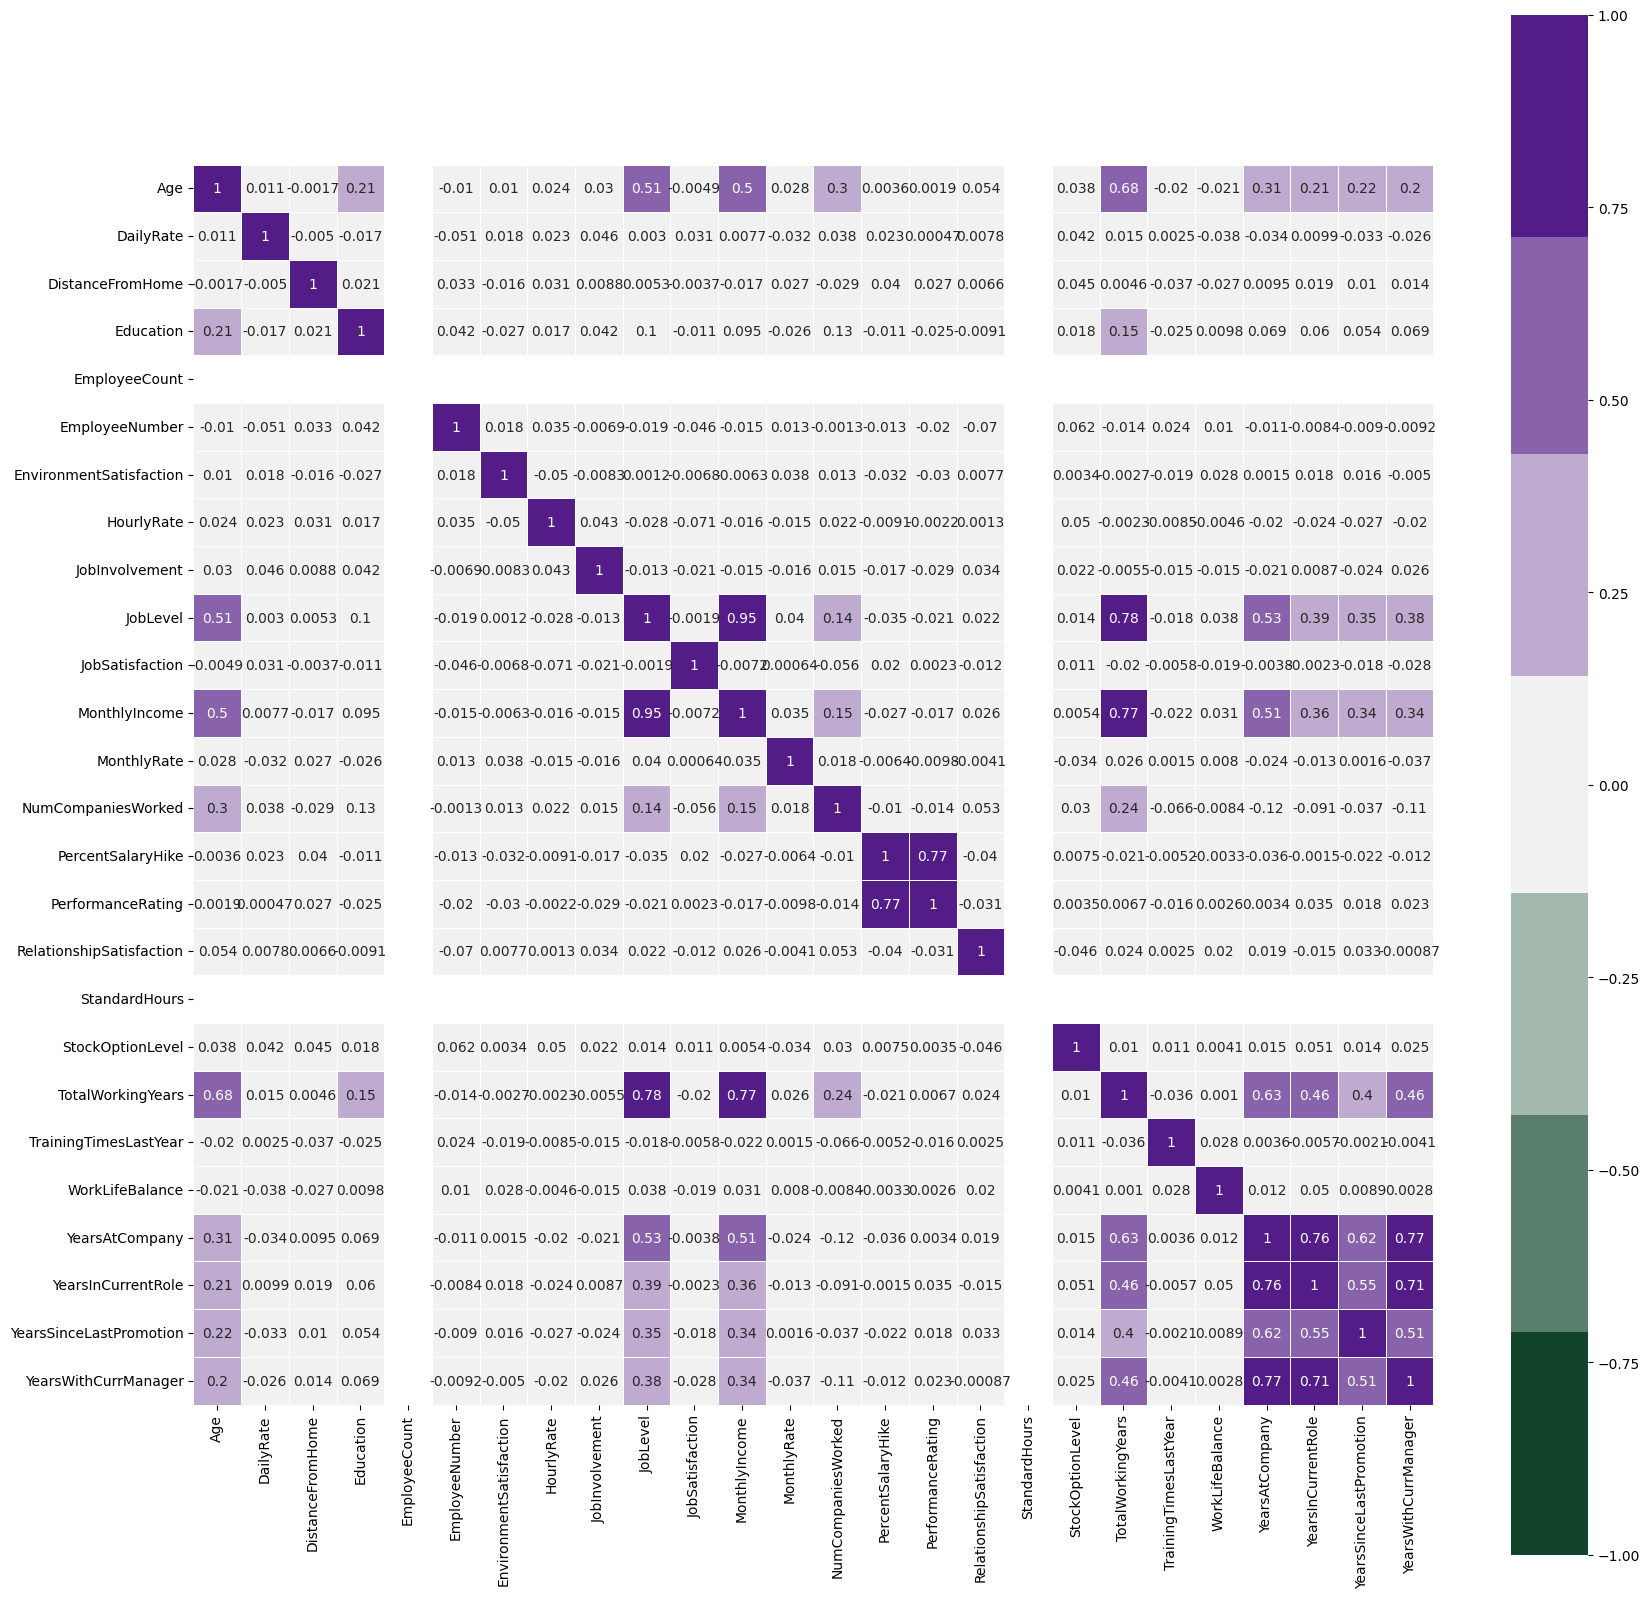

In [172]:
df1.dtypes


Age                          int64
Attrition                    int32
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
dtype: object

In [193]:
df1.groupby('StockOptionLevel')['PerformanceRating'].count()

StockOptionLevel
0    631
1    596
2    158
3     85
Name: PerformanceRating, dtype: int64

In [195]:
df1['PerformanceRating'].unique()

array([3, 4], dtype=int64)

In [191]:
df1['StockOptionLevel'].value_counts()

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

Elimino las columnas redundantes

In [108]:
df1['EmployeeCount'].value_counts()

EmployeeCount
1    1470
Name: count, dtype: int64

In [109]:
df1['StandardHours'].value_counts()

StandardHours
80    1470
Name: count, dtype: int64

In [110]:
df1['DailyRate'].value_counts()

DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64

In [111]:
df1['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [112]:
df1['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [113]:
df1['Education'].value_counts()

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [114]:
df1['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [115]:
df1['EmployeeNumber'].value_counts()

EmployeeNumber
1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: count, Length: 1470, dtype: int64

In [116]:
df1.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [117]:
df1['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [118]:
df.groupby('Department')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\3610032312.py:1: FutureWarning: The provided callable <function mean at 0x000001A62546DA80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Department')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\3610032312.py:1: FutureWarning: The provided callable <function median at 0x000001A6255802C0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('Department')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
Department,,
Human Resources,6654.507937,3886.0
Research & Development,6281.252862,4374.0
Sales,6959.172646,5754.5


In [119]:
columnas_redundantes= ['EmployeeCount', 'Over18', 'DailyRate', 'StandardHours', 'EmployeeNumber']

In [120]:
df1= df1.drop(columnas_redundantes, axis= 1)

In [121]:
df1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,3,Male,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,4,Male,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2,Male,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,Sales,2,3,Medical,4,Male,63,...,3,4,0,17,3,2,9,6,0,8


In [122]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [123]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [124]:
df1.dtypes.value_counts()

int64     22
object     8
Name: count, dtype: int64

In [125]:
df1.shape

(1470, 30)

In [126]:
df1.isnull().sum().sum()

0

In [127]:
df1.duplicated().sum()

0

In [128]:
df1.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [129]:
df1.iloc[:, :21].describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741
std,9.135373,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824
min,18.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000
25%,30.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000
75%,43.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000
max,60.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000


In [130]:
df1.iloc[:, 21:].describe()

,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### ANÁLISIS UNIVARIANTE

In [155]:
df1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,Research & Development,23,2,Medical,3,Male,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,Research & Development,6,1,Medical,4,Male,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,Research & Development,4,3,Life Sciences,2,Male,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,Sales,2,3,Medical,4,Male,63,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
# countplot variables nominales
# countplot variables ordinales
# (barplot?) variables discretas 
# histplot, boxplot variables continuas

In [165]:
#!pip install statsmodels

### ANALÍSIS BIVARIANTE

#### Variables Categóricas (Nominales)

In [ ]:
BusinessTravel              object
Department                  object
EducationField              object
Gender                      object
JobRole                     object
MaritalStatus               object
OverTime                    object

In [173]:
df.groupby('Department')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\3610032312.py:1: FutureWarning: The provided callable <function mean at 0x000001A62546DA80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Department')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\3610032312.py:1: FutureWarning: The provided callable <function median at 0x000001A6255802C0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('Department')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
Department,,
Human Resources,6654.507937,3886.0
Research & Development,6281.252862,4374.0
Sales,6959.172646,5754.5


In [175]:
df.groupby('Gender')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\1116162445.py:1: FutureWarning: The provided callable <function mean at 0x000001A62546DA80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Gender')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\1116162445.py:1: FutureWarning: The provided callable <function median at 0x000001A6255802C0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('Gender')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
Gender,,
Female,6686.566327,5081.5
Male,6380.507937,4837.5


In [176]:
df.groupby('MaritalStatus')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\4177486508.py:1: FutureWarning: The provided callable <function mean at 0x000001A62546DA80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('MaritalStatus')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\4177486508.py:1: FutureWarning: The provided callable <function median at 0x000001A6255802C0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('MaritalStatus')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
MaritalStatus,,
Divorced,6786.287462,5131.0
Married,6793.671620,5204.0
Single,5889.472340,4536.0


In [187]:
df.groupby('MaritalStatus')['Age'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\1323791143.py:1: FutureWarning: The provided callable <function mean at 0x000001A62546DA80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('MaritalStatus')['Age'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\1323791143.py:1: FutureWarning: The provided callable <function median at 0x000001A6255802C0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('MaritalStatus')['Age'].agg([np.mean, np.median])


,mean,median
MaritalStatus,,
Divorced,37.489297,37.0
Married,37.757801,36.0
Single,35.336170,34.0


In [177]:
df.groupby('JobRole')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\1251108155.py:1: FutureWarning: The provided callable <function mean at 0x000001A62546DA80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('JobRole')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\1251108155.py:1: FutureWarning: The provided callable <function median at 0x000001A6255802C0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('JobRole')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
JobRole,,
Healthcare Representative,7528.763359,6811.0
Human Resources,4235.750000,3093.0
Laboratory Technician,3237.169884,2886.0
Manager,17181.676471,17454.5
Manufacturing Director,7295.137931,6447.0
Research Director,16033.550000,16510.0
Research Scientist,3239.972603,2887.5
Sales Executive,6924.279141,6231.0
Sales Representative,2626.000000,2579.0


#### Variables Categóricas (Ordinales)

In [180]:
df.groupby('Education')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\4016758584.py:1: FutureWarning: The provided callable <function mean at 0x000001A62546DA80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Education')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\4016758584.py:1: FutureWarning: The provided callable <function median at 0x000001A6255802C0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('Education')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
Education,,
1,5640.570588,3849.0
2,6226.645390,4891.5
3,6517.263986,4762.0
4,6832.402010,5341.5
5,8277.645833,6203.0


Education: 1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor'

In [181]:
df.groupby('EnvironmentSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\3845046053.py:1: FutureWarning: The provided callable <function mean at 0x000001A62546DA80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('EnvironmentSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\3845046053.py:1: FutureWarning: The provided callable <function median at 0x000001A6255802C0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('EnvironmentSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
EnvironmentSatisfaction,,
1,6717.080986,5020.5
2,6283.728223,4963.0
3,6482.366446,4855.0
4,6528.511211,4872.5


EnvironmentSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'

In [182]:
df.groupby('JobInvolvement')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\806631547.py:1: FutureWarning: The provided callable <function mean at 0x000001A62546DA80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('JobInvolvement')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\806631547.py:1: FutureWarning: The provided callable <function median at 0x000001A6255802C0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('JobInvolvement')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
JobInvolvement,,
1,6418.108434,5346.0
2,6609.648000,5163.0
3,6521.637097,4815.5
4,6161.159722,4888.0


JobInvolvement: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'

In [183]:
df.groupby('JobSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\244261045.py:1: FutureWarning: The provided callable <function mean at 0x000001A62546DA80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('JobSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\244261045.py:1: FutureWarning: The provided callable <function median at 0x000001A6255802C0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('JobSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
JobSatisfaction,,
1,6561.570934,4968.0
2,6527.328571,4853.0
3,6480.495475,4788.5
4,6472.732026,5126.0


JobSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'

In [184]:
df.groupby('PerformanceRating')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\1954906032.py:1: FutureWarning: The provided callable <function mean at 0x000001A62546DA80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('PerformanceRating')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\1954906032.py:1: FutureWarning: The provided callable <function median at 0x000001A6255802C0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('PerformanceRating')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
PerformanceRating,,
3,6537.274116,4965.5
4,6313.893805,4777.0


PerformanceRating: 1 'Low', 2 'Good', 3 'Excellent', 4 'Outstanding'

In [185]:
df.groupby('RelationshipSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\2853107831.py:1: FutureWarning: The provided callable <function mean at 0x000001A62546DA80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('RelationshipSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\2853107831.py:1: FutureWarning: The provided callable <function median at 0x000001A6255802C0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('RelationshipSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
RelationshipSatisfaction,,
1,6177.793478,4745.0
2,6596.983498,4950.0
3,6543.773420,4907.0
4,6601.296296,5027.0


RelationshipSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'

In [186]:
df.groupby('WorkLifeBalance')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\49404431.py:1: FutureWarning: The provided callable <function mean at 0x000001A62546DA80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('WorkLifeBalance')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_34916\49404431.py:1: FutureWarning: The provided callable <function median at 0x000001A6255802C0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('WorkLifeBalance')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
WorkLifeBalance,,
1,5887.137500,4269.5
2,6461.808140,4970.0
3,6532.232923,4941.0
4,6746.352941,5067.0


#### Variables Numéricas

Dentro de las variables numéricas, me ecentraré en este caso en la correlación entre las variables contínuas

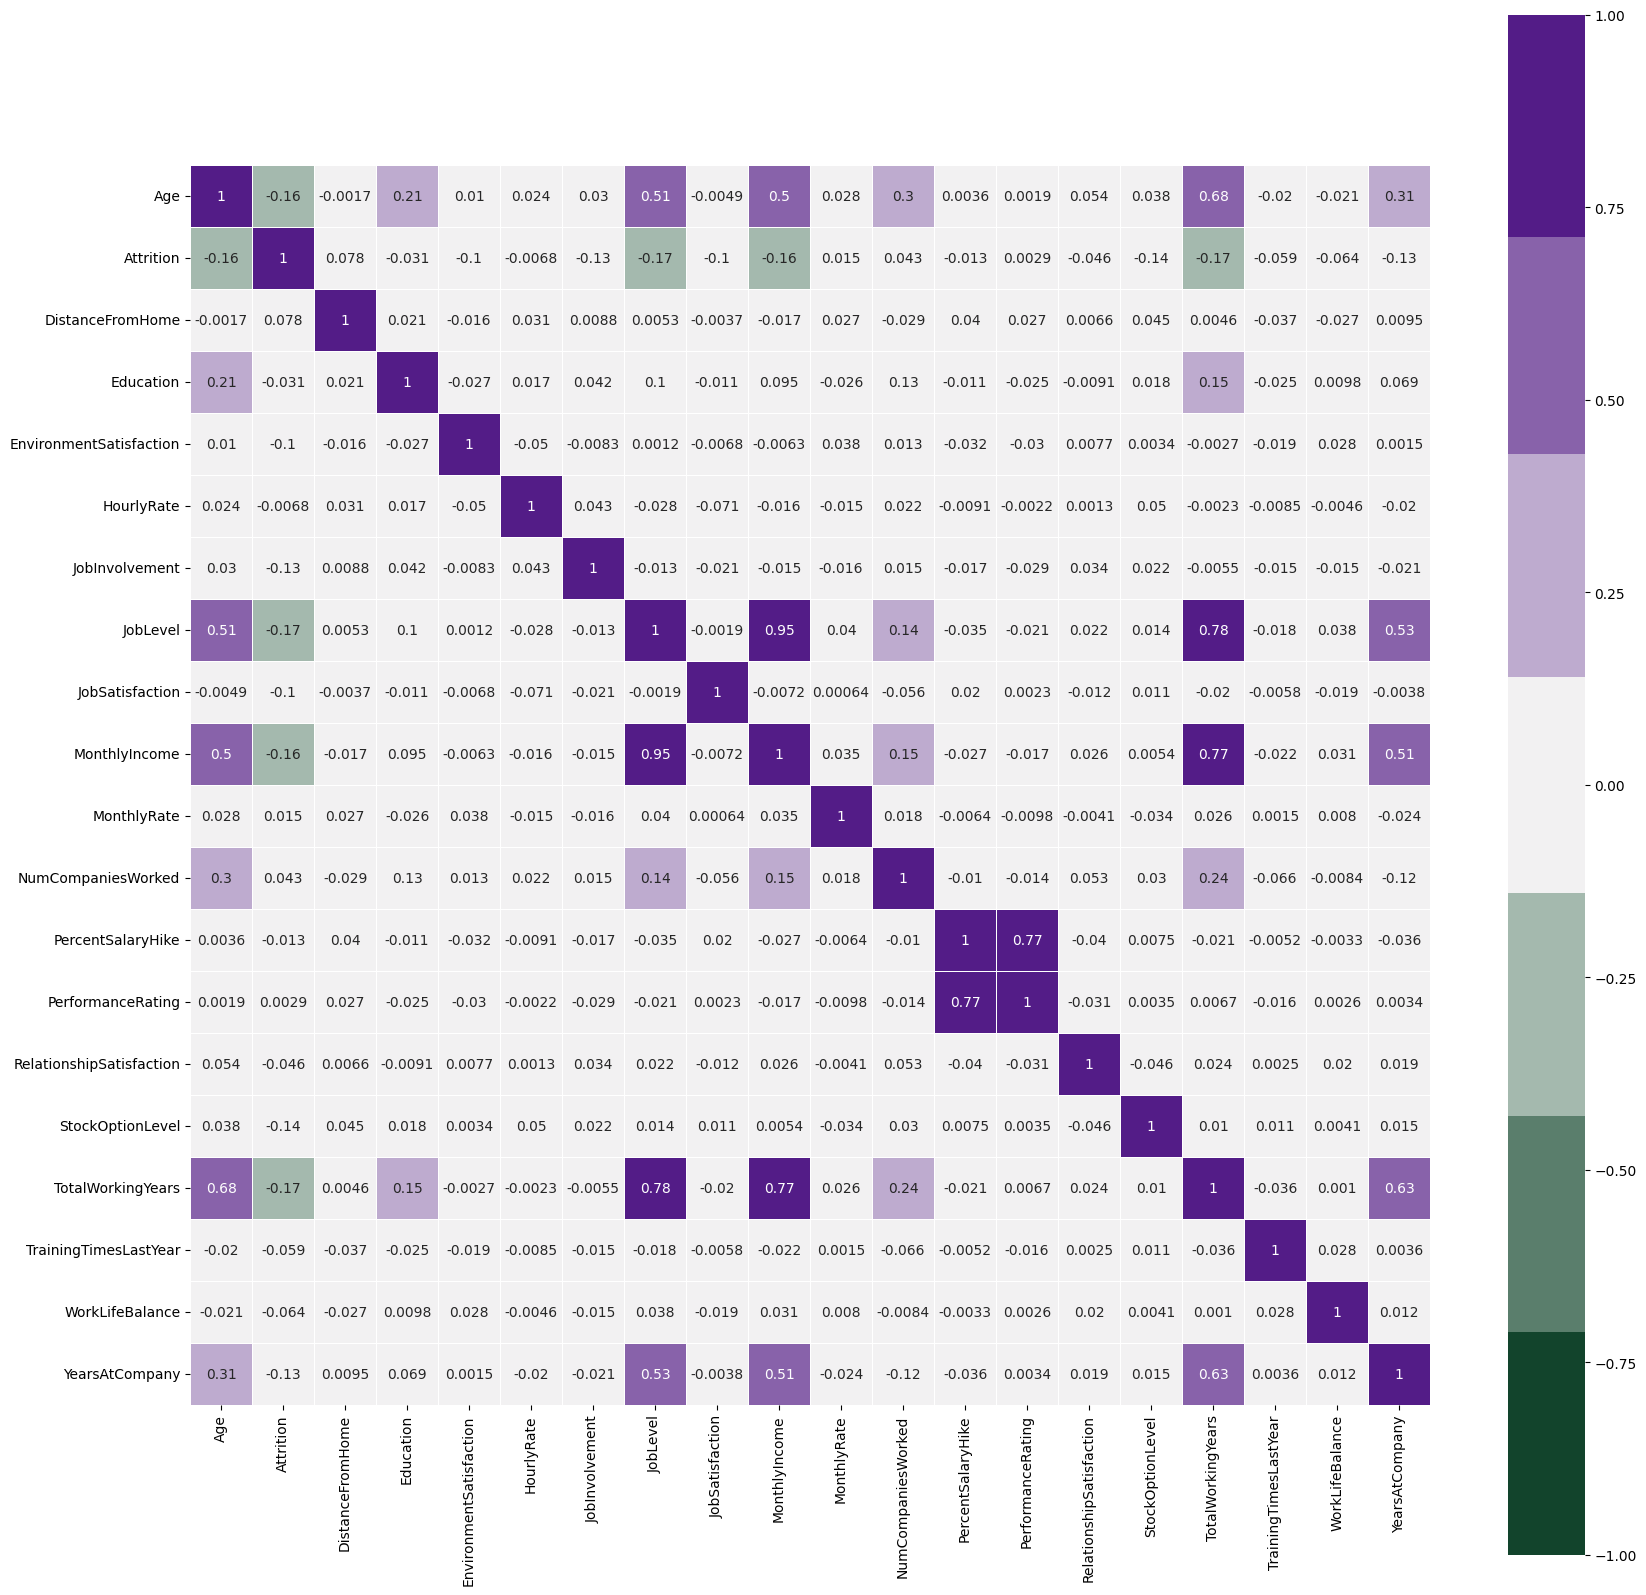

In [203]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(numeric_only=True),vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True, linewidths=.5, annot=True);

WorkLifeBalance: 1 'Bad', 2 'Good', 3 'Better', 4 'Best'

### ANÁLISIS MULTIVARIANTE

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
counted = pd.pivot_table(df1, index="Education", columns="EducationField", values="Attrition", aggfunc="count")
counted

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Education,,,,,,
1,2,67,14,63,5,19
2,2,116,24,99,19,22
3,16,233,59,183,24,57
4,5,173,52,104,33,31
5,2,17,10,15,1,3


In [ ]:
counted2 = pd.pivot_table(df1, index="Education", columns="EducationField", values="Attrition", aggfunc="sum")
counted2

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Education,,,,,,
1,1,8,4,10,2,6
2,0,18,6,15,1,4
3,4,37,15,25,2,16
4,1,25,9,13,6,4
5,1,1,1,0,0,2


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [179]:
X = df1[['YearsAtCompany', 'Age', 'TotalWorkingYears']]

y = df1['MonthlyIncome']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     732.1
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          8.13e-291
Time:                        16:51:33   Log-Likelihood:                -13844.
No. Observations:                1470   AIC:                         2.770e+04
Df Residuals:                    1466   BIC:                         2.772e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1813.1434    363.72

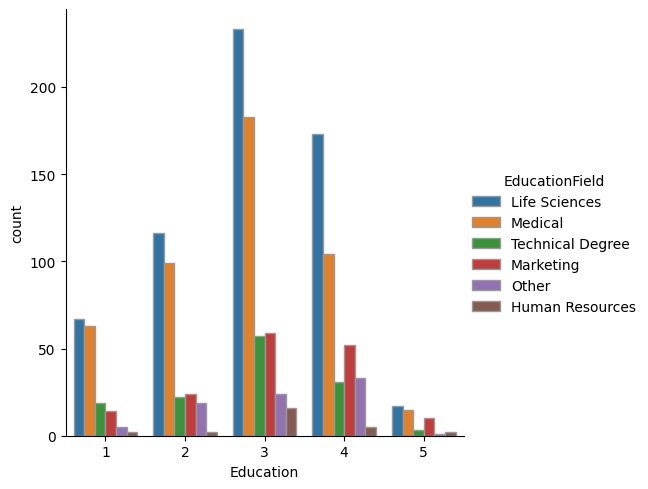

In [ ]:
sns.catplot(x="Education",
            hue="EducationField",
            kind="count",
            edgecolor=".6",
            orient = "V",
            data=df1);

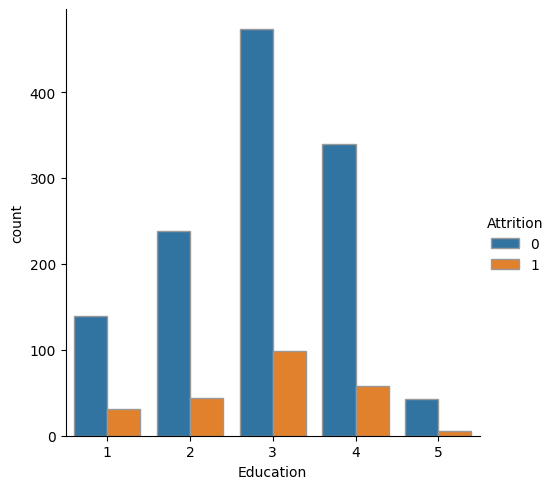

In [ ]:
sns.catplot(x="Education",
            hue="Attrition",
            kind="count",
            edgecolor=".6",
            orient = "V",
            data=df1);

<Figure size 2000x500 with 0 Axes>

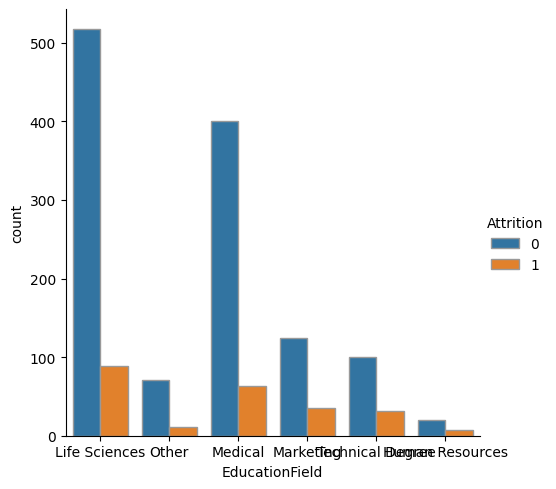

In [ ]:
plt.figure(figsize=(20,5))
sns.catplot(x="EducationField",
            hue="Attrition",
            kind="count",
            edgecolor=".6",
            orient = "V",
            data=df1)